# algrebra lineare

+ https://github.com/JuliaAcademy/DataScience/blob/master/02.%20Linear%20Algebra.ipynb

In [ ]:
using Pkg
Pkg.activate(".")

In [1]:
using LinearAlgebra
using SparseArrays
using Images
using MAT

In [27]:
using Pkg
#Pkg.add("MAT")
Pkg.add("ImageMagick")

   Updating registry at `C:\Users\i am\.julia\registries\General`
  Resolving package versions...
  Installed libpng_jll ────── v1.6.37+5
  Installed Libtiff_jll ───── v4.1.0+1
  Installed ImageMagick ───── v1.1.6
  Installed JpegTurbo_jll ─── v2.0.1+2
  Installed ImageMagick_jll ─ v6.9.10-12+3
Updating `C:\Users\i am\.julia\environments\v1.5\Project.toml`
  [6218d12a] + ImageMagick v1.1.6
Updating `C:\Users\i am\.julia\environments\v1.5\Manifest.toml`
  [6218d12a] + ImageMagick v1.1.6
  [c73af94c] + ImageMagick_jll v6.9.10-12+3
  [aacddb02] + JpegTurbo_jll v2.0.1+2
  [89763e89] + Libtiff_jll v4.1.0+1
  [b53b4c65] + libpng_jll v1.6.37+5


In [4]:
# poichè matrici son salvate in mem come array, meglio iterare su colonne rispetto che righe
A = rand(10,10); # created a random matrix of size 10-by-10
Atranspose = A' # matrix transpose
A = A*Atranspose; # matrix multiplication
@show A[11] == A[1,2];
#A[1:10] è prima riga, A[11] è quindi prima riga seconda colonnna

A[11] == A[1, 2] = true


In [13]:
#risoluz sis lin
b = rand(10)
x = A\b
@show norm(A*x-b)
# norma ≈ 0 -> Ax ≈ b

norm(A * x - b) = 2.9665507490243414e-12


10-element Array{Float64,1}:
 -4.780620344035924e-13
  4.1744385725905886e-14
 -2.831068712794149e-13
 -1.5016876631079867e-12
 -1.1115552922547067e-12
 -1.8538504065190864e-12
 -8.781864124784988e-13
 -6.488143355909415e-13
  4.634070904785403e-13
 -3.9457326295178063e-13

In [5]:
isposdef(A)
#matrice positiva definita è matrice simmetrica nella quale ogni autovalore è positivo
# se A è posdef allora t(x)Ax>0 per ogni vettore non nullo x

true

In [12]:
@show typeof(Atranspose)
sizeof(Atranspose)
# transpose non traspone veramente, tiene adjoint

typeof(Atranspose) = Adjoint{Float64,Array{Float64,2}}


8

In [11]:
sizeof(A)

800

In [13]:
#poicè adjoint, possiamo risalire alla matrice non transposa facilmente
Atranspose.parent

10×10 Array{Float64,2}:
 0.389487   0.196072  0.709937   0.206778  …  0.240629  0.165792   0.0767833
 0.440177   0.19682   0.858638   0.637242     0.515248  0.404306   0.502825
 0.50565    0.250091  0.141698   0.717208     0.887062  0.31445    0.900004
 0.0838596  0.424433  0.644828   0.779603     0.529695  0.449297   0.408935
 0.263764   0.704174  0.179648   0.976396     0.548318  0.983519   0.874577
 0.59169    0.398763  0.433366   0.850075  …  0.532752  0.284996   0.53182
 0.807232   0.285439  0.763267   0.906554     0.922842  0.406043   0.0141546
 0.0685355  0.448376  0.207981   0.761472     0.441878  0.316889   0.450097
 0.376372   0.147398  0.0625099  0.488454     0.605325  0.0823693  0.728467
 0.403602   0.877347  0.755292   0.716056     0.712594  0.192642   0.572092

In [14]:
#per ottenere vera trasposta possiamo usare copy
B = copy(Atranspose)

10×10 Array{Float64,2}:
 0.389487   0.440177  0.50565   0.0838596  …  0.0685355  0.376372   0.403602
 0.196072   0.19682   0.250091  0.424433      0.448376   0.147398   0.877347
 0.709937   0.858638  0.141698  0.644828      0.207981   0.0625099  0.755292
 0.206778   0.637242  0.717208  0.779603      0.761472   0.488454   0.716056
 0.425918   0.476219  0.592198  0.744769      0.793497   0.861691   0.589166
 0.866402   0.101093  0.84172   0.621916   …  0.49429    0.741216   0.152206
 0.696113   0.924686  0.682494  0.550386      0.794563   0.129061   0.31417
 0.240629   0.515248  0.887062  0.529695      0.441878   0.605325   0.712594
 0.165792   0.404306  0.31445   0.449297      0.316889   0.0823693  0.192642
 0.0767833  0.502825  0.900004  0.408935      0.450097   0.728467   0.572092

In [16]:
# già visto risolutore sistemi lineare \ in intro a julia

## fattorizzazione
utilizzate per semplificare risoluzione di sistemi lineari

In [21]:
# lu fact: divide matrice A in  L*U=P*A
#con L matrice triangolare inferiore a diag unitaria(L_ii = 1), U matrice triangolare superiore e 
# P matrce di permutazione è matrice contenente solo 1 e 0 dove ogni colonna ha un oe un solo 1 e ogni riga ha uno e un solo 1
luA = lu(A)
@show norm(luA.L*luA.U - luA.P*A)

norm(luA.L * luA.U - luA.P * A) = 2.082963028648268e-15


2.082963028648268e-15

In [22]:
# qr fact: decompone matrice quadrata A in  A=QR dove 
# Q è ortogonale t(Q)*Q = I ovvero la trasposta è l'inversa
# R è triangolare sup
qrA = qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
10×10 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.383865   0.490189     0.484172    0.441046   …   0.108563    0.00335782
 -0.24061   -0.46125      0.381933    0.100709      -0.370745   -0.17079
 -0.391304   0.345115    -0.543584    0.123569      -0.263998    0.319847
 -0.285141   0.282066    -0.0331303  -0.701375       0.0448498  -0.420776
 -0.313995  -0.00114472   0.430877   -0.347674       0.135337    0.183161
 -0.323999  -0.164091    -0.0855145  -0.181401   …   0.381922    0.487006
 -0.323195  -0.476988    -0.292525    0.112112       0.372645   -0.245863
 -0.29945    0.0733982   -0.176923    0.319926       0.19631    -0.53193
 -0.185824  -0.00269542  -0.1142     -0.129865      -0.606084   -0.144805
 -0.357919  -0.297421     0.015523    0.0506868     -0.264832    0.237437
R factor:
10×10 Array{Float64,2}:
 -8.87588  -6.67259   -10.6771    -7.56769    …  -5.88994     -10.5213
  0.0      -0.868545   -0.277838 

In [22]:
?factorize

search: factorize Factorization factorial



```
factorize(A)
```

Compute a convenient factorization of `A`, based upon the type of the input matrix. `factorize` checks `A` to see if it is symmetric/triangular/etc. if `A` is passed as a generic matrix. `factorize` checks every element of `A` to verify/rule out each property. It will short-circuit as soon as it can rule out symmetry/triangular structure. The return value can be reused for efficient solving of multiple systems. For example: `A=factorize(A); x=A\b; y=A\C`.

| Properties of `A`          | type of factorization                      |
|:-------------------------- |:------------------------------------------ |
| Positive-definite          | Cholesky (see [`cholesky`](@ref))          |
| Dense Symmetric/Hermitian  | Bunch-Kaufman (see [`bunchkaufman`](@ref)) |
| Sparse Symmetric/Hermitian | LDLt (see [`ldlt`](@ref))                  |
| Triangular                 | Triangular                                 |
| Diagonal                   | Diagonal                                   |
| Bidiagonal                 | Bidiagonal                                 |
| Tridiagonal                | LU (see [`lu`](@ref))                      |
| Symmetric real tridiagonal | LDLt (see [`ldlt`](@ref))                  |
| General square             | LU (see [`lu`](@ref))                      |
| General non-square         | QR (see [`qr`](@ref))                      |

If `factorize` is called on a Hermitian positive-definite matrix, for instance, then `factorize` will return a Cholesky factorization.

# Examples

```jldoctest
julia> A = Array(Bidiagonal(fill(1.0, (5, 5)), :U))
5×5 Array{Float64,2}:
 1.0  1.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0
 0.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  1.0

julia> factorize(A) # factorize will check to see that A is already factorized
5×5 Bidiagonal{Float64,Array{Float64,1}}:
 1.0  1.0   ⋅    ⋅    ⋅
  ⋅   1.0  1.0   ⋅    ⋅
  ⋅    ⋅   1.0  1.0   ⋅
  ⋅    ⋅    ⋅   1.0  1.0
  ⋅    ⋅    ⋅    ⋅   1.0
```

This returns a `5×5 Bidiagonal{Float64}`, which can now be passed to other linear algebra functions (e.g. eigensolvers) which will use specialized methods for `Bidiagonal` types.


In [23]:
#factorize  ritorna la fattorizzazione più utile per la matrice input rispetto al tipo di matrice
#i tipi di matrici possono esser dichiarati esplicitamente

In [28]:
# sparse matrix
# matrice contenente, per la stratrange maggioranza di comb colonna/riga, 0
# storata compressa
using SparseArrays
S = sprand(5,5,2/5)

5×5 SparseMatrixCSC{Float64,Int64} with 10 stored entries:
  [1, 1]  =  0.546534
  [3, 1]  =  0.133458
  [5, 1]  =  0.987296
  [2, 2]  =  0.864348
  [5, 2]  =  0.831911
  [3, 3]  =  0.935003
  [5, 4]  =  0.353319
  [1, 5]  =  0.185174
  [2, 5]  =  0.410785
  [5, 5]  =  0.610866

In [29]:
S

5×5 SparseMatrixCSC{Float64,Int64} with 10 stored entries:
  [1, 1]  =  0.546534
  [3, 1]  =  0.133458
  [5, 1]  =  0.987296
  [2, 2]  =  0.864348
  [5, 2]  =  0.831911
  [3, 3]  =  0.935003
  [5, 4]  =  0.353319
  [1, 5]  =  0.185174
  [2, 5]  =  0.410785
  [5, 5]  =  0.610866

In [30]:
Matrix(S)

5×5 Array{Float64,2}:
 0.546534  0.0       0.0       0.0       0.185174
 0.0       0.864348  0.0       0.0       0.410785
 0.133458  0.0       0.935003  0.0       0.0
 0.0       0.0       0.0       0.0       0.0
 0.987296  0.831911  0.0       0.353319  0.610866

In [31]:
S.rowval

10-element Array{Int64,1}:
 1
 3
 5
 2
 5
 3
 5
 1
 2
 5

In [35]:
S.colptr
#colptr indica dove iniziano le colonne
# eg, se S.colptr[2]=3, allora la seconda colonna inizia dal secondo elemento

6-element Array{Int64,1}:
  1
  4
  6
  7
  8
 11

In [36]:
S.nzval
# qua ci sono i valori effettivi

10-element Array{Float64,1}:
 0.5465342750341036
 0.13345824692476138
 0.9872961907663786
 0.8643477698976827
 0.8319111344612424
 0.9350032414744565
 0.3533188011997015
 0.18517389748700586
 0.4107853850468641
 0.6108655667797533

In [7]:
?norm

search: norm Normed normpath normalize normedview normalize! normalize_hue



```
norm(A, p::Real=2)
```

For any iterable container `A` (including arrays of any dimension) of numbers (or any element type for which `norm` is defined), compute the `p`-norm (defaulting to `p=2`) as if `A` were a vector of the corresponding length.

The `p`-norm is defined as

$$
\|A\|_p = \left( \sum_{i=1}^n | a_i | ^p \right)^{1/p}
$$

with $a_i$ the entries of $A$, $| a_i |$ the [`norm`](@ref) of $a_i$, and $n$ the length of $A$. Since the `p`-norm is computed using the [`norm`](@ref)s of the entries of `A`, the `p`-norm of a vector of vectors is not compatible with the interpretation of it as a block vector in general if `p != 2`.

`p` can assume any numeric value (even though not all values produce a mathematically valid vector norm). In particular, `norm(A, Inf)` returns the largest value in `abs.(A)`, whereas `norm(A, -Inf)` returns the smallest. If `A` is a matrix and `p=2`, then this is equivalent to the Frobenius norm.

The second argument `p` is not necessarily a part of the interface for `norm`, i.e. a custom type may only implement `norm(A)` without second argument.

Use [`opnorm`](@ref) to compute the operator norm of a matrix.

# Examples

```jldoctest
julia> v = [3, -2, 6]
3-element Array{Int64,1}:
  3
 -2
  6

julia> norm(v)
7.0

julia> norm(v, 1)
11.0

julia> norm(v, Inf)
6.0

julia> norm([1 2 3; 4 5 6; 7 8 9])
16.881943016134134

julia> norm([1 2 3 4 5 6 7 8 9])
16.881943016134134

julia> norm(1:9)
16.881943016134134

julia> norm(hcat(v,v), 1) == norm(vcat(v,v), 1) != norm([v,v], 1)
true

julia> norm(hcat(v,v), 2) == norm(vcat(v,v), 2) == norm([v,v], 2)
true

julia> norm(hcat(v,v), Inf) == norm(vcat(v,v), Inf) != norm([v,v], Inf)
true
```

---

```
norm(x::Number, p::Real=2)
```

For numbers, return $\left( |x|^p \right)^{1/p}$.

# Examples

```jldoctest
julia> norm(2, 1)
2.0

julia> norm(-2, 1)
2.0

julia> norm(2, 2)
2.0

julia> norm(-2, 2)
2.0

julia> norm(2, Inf)
2.0

julia> norm(-2, Inf)
2.0
```

---

```
norm(h::Histogram)
```

Calculate the norm of histogram `h` as the absolute value of its integral.


$$ \|A\|_p = \left( \sum_{i=1}^n | a_i | ^p \right)^{1/p} $$
with $a_i$ the entries of $A$, $| a_i |$ the norm of $a_i$, and $n$ the length of $A$. Since the p-norm is computed using the norms of the entries of A, the p-norm of a vector of vectors is not compatible with the interpretation of it as a block vector in general if p != 2.

p can assume any numeric value (even though not all values produce a mathematically valid vector norm). In particular, norm(A, Inf) returns the largest value in abs.(A), whereas norm(A, -Inf) returns the smallest. If A is a matrix and p=2, then this is equivalent to the Frobenius norm.

The second argument p is not necessarily a part of the interface for norm, i.e. a custom type may only implement norm(A) without second argument.

Use opnorm to compute the operator norm of a matrix.

## immagini come matrici


┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278


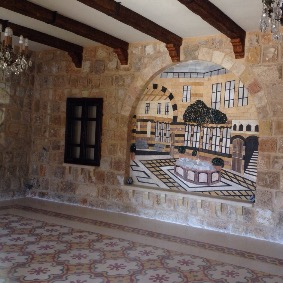

In [28]:
#download("https://github.com/JuliaAcademy/DataScience/raw/master/data/khiam-small.jpg","downloads/khiam-small.jpg")
X1 = load("downloads/khiam-small.jpg")

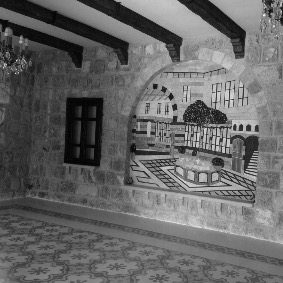

In [29]:
# immagini in julia sono in realtà matrici di RGBX
# traformiamo img in greyscale
Xgray = Gray.(X1)

In [31]:
#possiamo estrarre layer RGB facilmente
R = map(i->X1[i].r,1:length(X1))
R = Float64.(reshape(R,size(X1)...))

G = map(i->X1[i].g,1:length(X1))
#G = Float64.(reshape(G,size(X1)...))

B = map(i->X1[i].b,1:length(X1))
B = Float64.(reshape(B,size(X1)...))
;


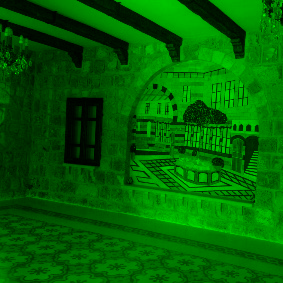

In [39]:
Z = zeros(size(R)...) # just a matrix of all zeros of equal size as the image
RGB.(Z,G,Z)
# per ott immagine servon 3 mat, per r,g,b
# azzerando r e b rimane scala verde

In [40]:
# possiamo ottenere valori di grigio
Xgrayvalues = Float64.(Xgray)

283×283 Array{Float64,2}:
 0.101961   0.0627451  0.0784314  0.0941176  …  0.509804  0.552941  0.666667
 0.0666667  0.0980392  0.0745098  0.054902      0.505882  0.584314  0.501961
 0.0784314  0.0862745  0.0784314  0.0862745     0.6       0.701961  0.611765
 0.0862745  0.0666667  0.0745098  0.0941176     0.658824  0.705882  0.145098
 0.0784314  0.101961   0.0901961  0.0745098     0.713725  0.682353  0.231373
 0.0745098  0.0745098  0.0784314  0.0862745  …  0.729412  0.701961  0.168627
 0.12549    0.0980392  0.0862745  0.0862745     0.627451  0.466667  0.192157
 0.439216   0.447059   0.305882   0.137255      0.231373  0.184314  0.137255
 0.458824   0.454902   0.45098    0.454902      0.196078  0.101961  0.117647
 0.45098    0.466667   0.458824   0.45098       0.584314  0.121569  0.137255
 0.458824   0.458824   0.458824   0.454902   …  0.521569  0.513725  0.12549
 0.466667   0.45098    0.458824   0.47451       0.576471  0.741176  0.117647
 0.45098    0.45098    0.462745   0.458824      0.5

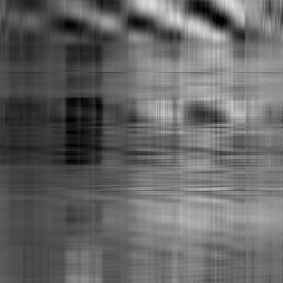

In [49]:
#per fare dowensample (abbassare colordepth etc) dell immagine tramite decomposizione svd
SVD_V = svd(Xgrayvalues)
# use the top 4 singular vectors/values to form a new image

i = 1:4
u1 = SVD_V.U[:,i]
v1 = SVD_V.V[:,i]
img1 = u1*spdiagm(0=>SVD_V.S[i])*v1'
Gray.(img1)

In [52]:
# aumentando numero vett/val usati ci avvicianiamo all'immagine originaria
i = 1:100
u1 = SVD_V.U[:,i]
v1 = SVD_V.V[:,i]
img1 = u1*spdiagm(0=>SVD_V.S[i])*v1'
Gray.(img1)

283×283 Array{Float64,2}:
 0.100856   0.0569955  0.0818019  0.0780115  …  0.530094  0.569754   0.630574
 0.0743689  0.0984393  0.0704655  0.0526415     0.506852  0.580809   0.562675
 0.0589517  0.0711039  0.0683453  0.0959866     0.58476   0.719855   0.533653
 0.0974717  0.0848408  0.0837489  0.0904253     0.668756  0.681848   0.222879
 0.104445   0.107027   0.0868258  0.0730753     0.687611  0.680118   0.210656
 0.0676765  0.0556577  0.0760422  0.0893689  …  0.752865  0.672228   0.236768
 0.10611    0.111254   0.0841758  0.0983413     0.584747  0.491749   0.154249
 0.437285   0.431275   0.302365   0.171581      0.228224  0.198974   0.130097
 0.461987   0.483297   0.463278   0.434146      0.262747  0.0814775  0.103984
 0.444505   0.448726   0.460318   0.45205       0.50672   0.193073   0.136438
 0.459768   0.468354   0.447324   0.468116   …  0.557711  0.475173   0.116791
 0.471991   0.456029   0.459634   0.449243      0.581855  0.703053   0.158639
 0.436686   0.429651   0.462334   0.47

In [54]:
#non è comunque la stessa immagine (difatti SVD_V.U è mat a 283 colonne, noi ne stiamo usando 100) 
norm(img1-Xgrayvalues)

5.528187095958997

In [56]:
download("https://github.com/JuliaAcademy/DataScience/blob/master/data/face_recog_qr.mat?raw=true", "downloads/face_recog_qr.mat")

"downloads/face_recog_qr.mat"

In [57]:
M = matread("downloads/face_recog_qr.mat")

#leggiamo il .mat, è un dizionario string->any

Dict{String,Any} with 1 entry:
  "V2" => [0.08103 0.0729089 … 0.0529805 0.0594823; 0.089725 0.082329 … 0.05180…

In [61]:
M["V2"]
# ogni vett in V2 è fase image

32256×490 Array{Float64,2}:
 0.08103    0.0729089  0.0747639  …  0.036122   0.0529805  0.0594823
 0.089725   0.082329   0.0738271     0.0388712  0.0518082  0.063573
 0.0873804  0.0784074  0.0763408     0.0375298  0.0587571  0.0667269
 0.084184   0.0837368  0.0776823     0.0408351  0.0566905  0.0667694
 0.0892354  0.0814347  0.0767455     0.0407927  0.050914   0.0592467
 0.0872113  0.0874228  0.0760628  …  0.0425812  0.0520863  0.0631683
 0.0906193  0.0842264  0.0772351     0.0473971  0.0590351  0.0668118
 0.0987404  0.0803049  0.0795797     0.0501888  0.0652588  0.0753377
 0.0893203  0.0869757  0.0800269     0.0478867  0.0643406  0.0797064
 0.0858459  0.0865286  0.080474      0.043518   0.0700082  0.0785341
 0.0931994  0.08787    0.0756581  …  0.0538988  0.0674945  0.0753377
 0.0892778  0.0943717  0.0837793     0.0580319  0.0651924  0.0788546
 0.0994656  0.0953324  0.0929639     0.0529805  0.0723528  0.0834588
 ⋮                                ⋱                        
 0.103345   0.04

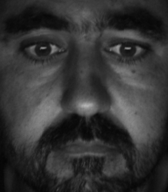

In [79]:
q = reshape(M["V2"][:,1],192,168)# rimpiccioliamo immagine per vederla
Gray.(q)

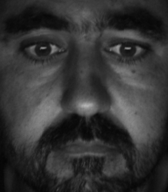

In [81]:
# tornamo all immagine vettorizzata
# selezionaimo immagini più simili
b = q[:]
# nb : vettorizza matrice rispetto alla colonna

#rimuoviamo la prima immagine dal diz
# l obiettivo è trovare soluz a sis lin Ax=b dopve A è dizionario di immagini e b è la nostra immagine
# in face recog quel che facciamo è minimizzare norm(Ax-b) 
# \, su matrici non invertibili, risolve via quadrati minimi 

A = M["V2"][:,2:end]
x = A\b #Ax=b
Gray.(reshape(A*x,192,168))

489-element Array{Float64,1}:
  0.00778999466428088
  0.03706699657439072
 -0.018618218609967447
 -0.10883280908863777
 -0.11312772851249936
  0.10426677898960787
 -0.0781305540124407
  0.2553674489324585
 -0.09438028730255675
  0.04721403743537006
 -0.08422055581221456
  0.016835234622109587
  0.010660017288331039
  ⋮
 -0.006280126458319339
 -0.01311276750524758
 -0.004951180052151004
 -0.00490357859001869
  0.11499416430661381
 -0.050917072830440606
 -0.0004935779046519621
 -0.1978854641294586
 -0.014213060249317786
  0.09959842092937986
  0.303575936306492
 -0.13674038828240107

In [82]:
norm(A*x-b)

3.788571908461458e-14

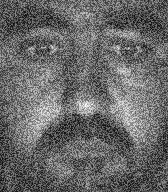

In [83]:
# distorgiamo immagine aggiungendo errore rendendola più difficile da trovare nel dizz

qv = q+rand(size(q,1),size(q,2))*0.5
qv = qv./maximum(qv)
Gray.(qv)

In [84]:
b = qv[:];
x = A\b
norm(A*x-b)
# nota errore molto superiore

23.72200611141902

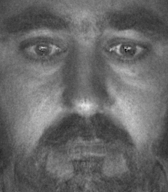

In [87]:

Gray.(reshape(A*x,192,168))

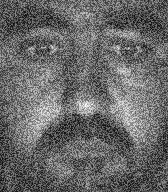

In [88]:
Gray.(qv)

In [89]:
192*168


32256